In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import requests
import time
from datetime import datetime
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.alpha'] = 0.3
plt.rcParams['axes.titlesize'] = 18

In [ ]:
t = pd.read_csv('timestamps.txt', delimiter='|', names=['times', 'slot'])
t['times'] = pd.to_datetime(t['times'], format="%Y-%m-%d %H:%M:%S.%f")
t['rounded'] = np.asarray([pd.Timestamp(x).round(freq='12S') for x in t['times'].values])
t['rounded2'] = np.asarray([pd.to_datetime(datetime.fromtimestamp(s)) for s in seconds])
t.head()

In [ ]:
seconds = t['slot'].values * 12 + 1606824023
seconds

In [ ]:
pd.to_datetime(datetime.fromtimestamp(1669420163))

In [ ]:
t['rounded2'] = datetime.fromtimestamp(1669420163)

In [ ]:
t.head(n=100)

In [ ]:
diffs = np.asarray([v.total_seconds() for v in t['rounded'] - t['times']])
diffs += 1
# diffs2 = np.asarray([v.total_seconds() for v in  t['times'] - t['rounded2']])

In [ ]:
np.quantile(diffs, .9985)

In [ ]:
bins = np.histogram(diffs, bins=600)[1]

In [ ]:
diffs2 + 18000

In [ ]:
f, ax = plt.subplots(figsize=(10,7))
ax.hist(diffs2 + 18000, bins=500)

plt.show()

In [ ]:
plt.hist(diffs, bins=600)

In [ ]:
t = pd.read_csv('Query Results.csv', delimiter='|', names=['times'])
t['times'] = pd.to_datetime(t['times'], format="%Y-%m-%d %H:%M:%S.%f")
t['rounded'] = np.asarray([pd.Timestamp(x).round(freq='12S') for x in t['times'].values])
# t['rounded2'] = np.asarray([pd.to_datetime(datetime.fromtimestamp(s)) for s in seconds])
t.head()

In [ ]:
diffs = np.asarray([v.total_seconds() for v in t['rounded'] - t['times']])
diffs += 1
# diffs2 = np.asarray([v.total_seconds() for v in  t['times'] - t['rounded2']])

In [ ]:
plt.hist(diffs, bins=600)

In [ ]:
t = pd.read_csv('downloaded-logs-20230404-072549.csv', delimiter=',')
t.head()

In [ ]:
ms = t['jsonPayload.msIntoSlot']
ms

In [ ]:
f, ax = plt.subplots(figsize=(8,5))
ax.plot(np.arange(len(ms)), ms, 'g.')
ax.set_ylim(0,5000)

In [ ]:
f, ax = plt.subplots(figsize=(8,5))
ax.hist(ms[ms<8000], color='g', bins=50)
# ax.set_ylim(0,5000)

In [ ]:
slots = np.asarray(list(set(t['jsonPayload.slot'])))

In [ ]:
len(slots)

In [ ]:
for i in slots:
    print(i)

In [ ]:
np.savetxt('slots.txt', slots)

In [ ]:
plt.plot(slots)

In [ ]:
slots.min(), slots.max()

In [ ]:
payload = '['
for i in feb26['block_number'].values[2100:]:
    template = '"jsonrpc":"2.0","method":"eth_getBlockByNumber","params":["0x{:02x}",false],"id":0'.format(i)
    payload += "{"
    payload += template
    payload += "},"
payload=payload[:-1]
payload += "]"
payload

In [ ]:
curl https://eth-mainnet.g.alchemy.com/v2/cnHeH_ifD-29lrdBoGTMISiDgmrF9ZBz -X POST -H
    "Content-Type: application/json" -s -d '[{"jsonrpc":"2.0","method":"eth_getBlockByNumber","params":["0xfb86ba",false],"id":0},{"jsonrpc":"2.0","method":"eth_getBlockByNumber","params":["0xfb86bb",false],"id":0}]' 
    | jq -jr '.[] | .result["number"], " ", .result["hash"], "\n"' > feb263.txt

In [ ]:
slots

In [ ]:
url = 'https://beaconcha.in/api/v1/slot/6150115'
headers = {'content-type': 'application/json'}
r = requests.get(url, headers=headers)

In [ ]:
r.json()['status']

In [ ]:
res = []
for s in slots:
    time.sleep(0.5)
    url = 'https://beaconcha.in/api/v1/slot/{}'.format(s)
    headers = {'content-type': 'application/json'}
    r = requests.get(url, headers=headers)
    try: 
        if r.json()['status'] != 'OK':
            print(s, False)
            res.append((s, False))
        else:
            res.append((s, True))
            print(s, True)
    except KeyError:
        print(r.json())

In [82]:
url = 'http://57.128.92.65:3500/eth/v2/beacon/blocks/{}'.format(6148193)
headers = {'content-type': 'application/json'}
r = requests.get(url, headers=headers)
try: 
    code = r.json()['code']
    print(False)
except KeyError:
    print(True)

True


In [83]:
r.json()

{'version': 'bellatrix',
 'data': {'message': {'slot': '6148193',
   'proposer_index': '48968',
   'parent_root': '0xc93389848351ec993b69353f96ccb5dc680e5037f3c50adb982d5138ce3e84c9',
   'state_root': '0x9dd6320c0d30030eb0a81a9fad1a5ba74035fc9eed463aa0403da439f87d14fa',
   'body': {'randao_reveal': '0x956993fb57e6b1e977cfc5eca8740ae8a8bc7ab87faf55a126dfd5c8978554436a665c3a28265a39104d8a8f1a2d0abd1694e3716f00a138620600bb7502c9da98d68ec288783466894ce1682217e231350e3b3b31ad436995843755ff6f338e',
    'eth1_data': {'deposit_root': '0xecde1ca01df8074878000ce0b11a52266a7c02e7a620e3ecc9c5599d167edf37',
     'deposit_count': '578041',
     'block_hash': '0xb005a35b5dcf69b42ac0acae43618b582a2a8f4e35fed828904798c766258274'},
    'graffiti': '0x0000000000000000000000000000000000000000000000000000000000000000',
    'proposer_slashings': [],
    'attester_slashings': [],
    'attestations': [{'aggregation_bits': '0xfffffffffffffffffffffffffffffffff7dfffffffffffffffffffffffffffffffff07',
      'data'

In [59]:
res = []
for s in slots:
    time.sleep(0.1)
    url = 'http://57.128.92.65:3500/eth/v2/beacon/blocks/{}'.format(s)
    headers = {'content-type': 'application/json'}
    r = requests.get(url, headers=headers)
    try: 
        code = r.json()['code']
        print(s, False)
        res.append((s, False))
    except KeyError:
        print(s, True)
        res.append((s, True))

6144827 True
6144830 True
6144832 False
6144834 False
6144837 True
6144838 False
6144844 True
6144851 True
6144854 True
6144880 True
6144888 True
6144892 True
6144902 True
6144916 True
6144920 True
6144928 True
6144930 True
6144935 True
6144936 True
6144943 True
6144944 True
6144947 True
6144948 True
6144949 True
6144957 True
6144960 True
6144982 True
6144985 True
6144988 True
6144989 True
6144991 True
6145002 True
6145009 True
6145013 True
6145017 True
6145018 True
6145022 True
6145029 True
6145034 True
6145037 True
6145038 True
6145042 True
6145043 True
6145048 True
6145050 True
6145051 True
6145052 True
6145053 True
6145056 False
6145061 True
6145067 True
6145070 True
6145074 True
6145075 True
6145080 True
6145081 True
6145083 True
6145084 True
6145086 True
6145088 True
6145089 True
6145091 True
6145092 True
6145093 True
6145094 False
6145096 True
6145098 True
6145101 True
6145104 True
6145117 True
6145118 True
6145120 False
6145121 True
6145125 True
6145130 True
6145131 True
614513

6146754 True
6146755 True
6146756 True
6146758 True
6146760 True
6146762 True
6146764 True
6146770 True
6146772 True
6146774 True
6146778 True
6146784 True
6146785 True
6146787 True
6146793 True
6146804 True
6146805 True
6146814 True
6146815 True
6146823 True
6146824 True
6146828 True
6146831 True
6146832 True
6146833 True
6146836 True
6146838 True
6146841 True
6146843 True
6146844 True
6146846 True
6146848 True
6146850 True
6146856 True
6146862 True
6146863 True
6146864 True
6146865 True
6146866 True
6146875 True
6146877 True
6146881 True
6146883 True
6146884 True
6146887 True
6146888 True
6146891 True
6146895 True
6146897 True
6146901 True
6146904 True
6146908 True
6146919 True
6146929 True
6146930 True
6146939 True
6146941 True
6146943 True
6146946 True
6146948 True
6146957 True
6146965 True
6146966 True
6146967 True
6146970 True
6146971 True
6146975 True
6146976 False
6146982 True
6146984 True
6146985 True
6146986 True
6146990 True
6146993 True
6146995 True
6147003 True
6147007 Tru

6148599 True
6148600 True
6148603 True
6148609 True
6148610 True
6148621 True
6148623 True
6148624 True
6148625 True
6148626 True


In [60]:
res = np.asarray(res)

In [61]:
res

array([[6144827,       1],
       [6144830,       1],
       [6144832,       0],
       ...,
       [6148624,       1],
       [6148625,       1],
       [6148626,       1]])

In [66]:
res[:,1].sum(), len(res), len(res) - res[:,1].sum()

(1232, 1269, 37)

In [65]:
6148626 - 6144827

3799

In [ ]:
len(res), res[]

In [75]:
37/1269

0.029156816390858944

## post 3s

In [97]:
t = pd.read_csv('downloaded-logs-20230404-132958.csv', delimiter=',')
t.head()

,insertId,jsonPayload.blockHash,jsonPayload.contentLength,jsonPayload.headSlot,jsonPayload.idArg,jsonPayload.level,jsonPayload.method,jsonPayload.mevBoostV,jsonPayload.msIntoSlot,jsonPayload.msg,...,receivedLocation,resource.labels.cluster_name,resource.labels.container_name,resource.labels.location,resource.labels.namespace_name,resource.labels.pod_name,resource.labels.project_id,resource.type,severity,timestamp
0,qcp5erd2vpnrrrud,0x91a6011be8c01ca8b3da434490f49714d012bdf94656...,54037,6150442,NaN,info,getPayload,1.4.0,1857,getPayload request received,...,NaN,midori,proposer-api,europe-west1-b,default,proposer-api-dbd9cb97f-6zdz6,ultra-sound-relay,k8s_container,INFO,2023-04-04T17:29:00Z
1,k23g10yoxoz9v1ym,0xe3b3f8f11dc7300dd7fea84ece939f63f960dfd70e5d...,84765,6150438,NaN,info,getPayload,v1.3.2-44-g08bd891,700,getPayload request received,...,NaN,midori,proposer-api,europe-west1-b,default,proposer-api-dbd9cb97f-m7mcw,ultra-sound-relay,k8s_container,INFO,2023-04-04T17:28:11Z
2,x8rqwpc22vnlmoi0,0x87d16ce758de89213329d0f68c933a12664732ccd33d...,57880,6150434,NaN,info,getPayload,v1.5.0,947,getPayload request received,...,NaN,midori,proposer-api,europe-west1-b,default,proposer-api-dbd9cb97f-mf8dr,ultra-sound-relay,k8s_container,INFO,2023-04-04T17:27:23Z
3,mc0o06mm8js0tecg,0x2d100c7e2326027a0fa344e835e92f9b67dbc9c1601d...,84755,6150428,NaN,info,getPayload,v1.5.0,811,getPayload request received,...,NaN,midori,proposer-api,europe-west1-b,default,proposer-api-dbd9cb97f-mf8dr,ultra-sound-relay,k8s_container,INFO,2023-04-04T17:26:11Z
4,jzgo4obzf0426lmo,0xd2c42bf3d991a69e36ba79d481f1ebceed9f78d0059d...,84763,6150424,NaN,info,getPayload,-,671,getPayload request received,...,NaN,midori,proposer-api,europe-west1-b,default,proposer-api-dbd9cb97f-6zdz6,ultra-sound-relay,k8s_container,INFO,2023-04-04T17:25:23Z


In [98]:
slots = np.asarray(list(set(t['jsonPayload.slot'])))
len(slots)

718

In [69]:
res = []
for s in slots:
    time.sleep(0.1)
    url = 'http://57.128.92.65:3500/eth/v2/beacon/blocks/{}'.format(s)
    headers = {'content-type': 'application/json'}
    r = requests.get(url, headers=headers)
    try: 
        code = r.json()['code']
        print(s, False)
        res.append((s, False))
    except KeyError:
        print(s, True)
        res.append((s, True))

6150144 True
6150147 True
6150149 True
6150151 True
6150157 True
6150158 True
6150160 True
6150162 True
6150163 True
6150164 True
6150165 True
6150166 True
6150167 True
6150169 True
6150171 True
6150173 True
6150175 True
6150176 True
6150177 True
6150178 True
6150181 True
6150182 True
6150183 True
6150191 True
6150198 True
6150199 True
6150201 True
6150202 True
6150205 True
6150208 True
6150217 True
6150222 True
6150229 True
6150233 True
6150238 True
6150240 True
6150243 True
6150247 True
6150248 True
6150253 True
6150255 True
6150260 True
6150262 True
6150264 True
6150265 True
6150268 True
6150270 True
6150275 True
6150279 True
6150280 True
6150281 True
6150293 True
6150295 True
6150297 True
6150298 True
6150304 True
6150305 True
6150309 True
6150313 True
6150315 True
6150316 True
6150327 True
6150328 True
6150331 True
6150332 True
6150339 True
6150341 True
6150342 True
6150345 True
6150350 True
6150352 True
6150356 True
6150358 True
6150359 True
6150361 True
6150369 True
6150370 True

6149891 True
6149892 True
6149893 True
6149899 True
6149904 True
6149905 True
6149906 True
6149907 True
6149911 True
6149914 True
6149921 True
6149922 True
6149924 True
6149926 True
6149929 True
6149933 True
6149942 True
6149943 True
6149944 True
6149946 True
6149947 True
6149949 True
6149951 True
6149954 True
6149955 True
6149957 True
6149959 True
6149961 True
6149962 True
6149963 True
6149964 True
6149966 True
6149967 True
6149973 True
6149974 True
6149975 True
6149978 True
6149980 True
6149982 True
6149984 True
6149997 True
6149998 True
6150000 True
6150001 True
6150008 True
6150009 True
6150010 True
6150013 True
6150014 True
6150019 True
6150022 True
6150025 True
6150027 True
6150033 True
6150034 True
6150035 True
6150045 True
6150047 True
6150050 True
6150053 True
6150056 True
6150058 True
6150060 True
6150062 True
6150063 True
6150067 True
6150071 True
6150077 True
6150078 True
6150081 True
6150084 True
6150086 True
6150093 True
6150098 True
6150102 True
6150106 True
6150107 True

In [71]:
res = np.asarray(res)

In [99]:
res[:,1].sum(), len(res), len(res) - res[:,1].sum()

(714, 718, 4)

In [105]:
[v for v in res if v[1] == 0]

[array([6148669,       0]),
 array([6148694,       0]),
 array([6149011,       0]),
 array([6149120,       0])]

In [100]:
4/718

0.005571030640668524

In [73]:
slots.max() - slots.min()

2096

In [76]:
ms = t['jsonPayload.msIntoSlot']

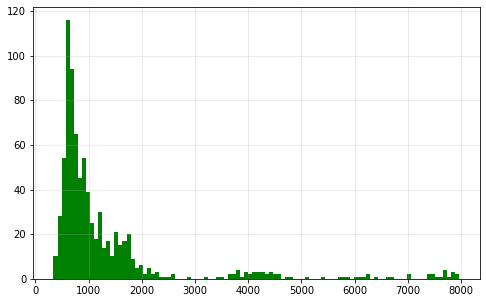

In [79]:
f, ax = plt.subplots(figsize=(8,5))
ax.hist(ms[ms<8000], color='g', bins=100)

plt.show()

In [86]:
1857

1857

In [88]:
t['jsonPayload.slot']

0      6150443
1      6150439
2      6150435
3      6150429
4      6150425
        ...   
803    6148355
804    6148351
805    6148349
806    6148348
807    6148347
Name: jsonPayload.slot, Length: 808, dtype: int64

In [ ]:
17:29:02.344202

In [84]:
ms

0      1857
1       700
2       947
3       811
4       671
       ... 
803    2271
804    1545
805     890
806     630
807     513
Name: jsonPayload.msIntoSlot, Length: 808, dtype: int64

## signed at

In [90]:
t = pd.read_csv('signedat.txt', delimiter='|', names=['signed_at'])
t['signed_at'] = pd.to_datetime(t['signed_at'], format="%Y-%m-%d %H:%M:%S.%f")
t['rounded'] = np.asarray([pd.Timestamp(x).round(freq='12S') for x in t['signed_at'].values])
# t['rounded2'] = np.asarray([pd.to_datetime(datetime.fromtimestamp(s)) for s in seconds])
t.head()

,signed_at,rounded
0,2023-03-21 21:10:59.584453,2023-03-21 21:11:00
1,2023-03-21 21:11:11.732092,2023-03-21 21:11:12
2,2023-03-21 21:11:23.960128,2023-03-21 21:11:24
3,2023-03-21 21:11:47.739006,2023-03-21 21:11:48
4,2023-03-21 21:12:12.388894,2023-03-21 21:12:12


In [91]:
diffs = np.asarray([v.total_seconds() for v in t['rounded'] - t['signed_at']])
diffs += 1

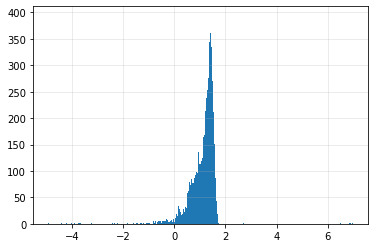

In [93]:
plt.hist(diffs, bins=600)
plt.show()

In [96]:
diffs.max()

6.978654

In [101]:
new = pd.read_csv('slots-0404-1.txt', names=['slots'])
new.head()

,slots
0,6148347
1,6148348
2,6148349
3,6148351
4,6148354


In [106]:
res2 = []
for s in new['slots']:
    time.sleep(0.1)
    url = 'http://57.128.92.65:3500/eth/v2/beacon/blocks/{}'.format(s)
    headers = {'content-type': 'application/json'}
    r = requests.get(url, headers=headers)
    try: 
        code = r.json()['code']
        print(s, False)
        res2.append((s, False))
    except KeyError:
        print(s, True)
        res2.append((s, True))

6148347 True
6148348 True
6148349 True
6148351 True
6148354 True
6148355 True
6148357 True
6148359 True
6148360 True
6148361 True
6148362 True
6148363 True
6148364 True
6148365 True
6148367 True
6148368 True
6148369 True
6148370 True
6148371 True
6148372 True
6148374 True
6148377 True
6148379 True
6148380 True
6148381 True
6148383 True
6148384 True
6148385 True
6148386 True
6148387 True
6148390 True
6148392 True
6148395 True
6148396 True
6148398 True
6148403 True
6148404 True
6148405 True
6148406 True
6148408 True
6148410 True
6148411 True
6148414 True
6148415 True
6148416 True
6148417 True
6148418 True
6148419 True
6148420 True
6148421 True
6148422 True
6148423 True
6148424 True
6148425 True
6148426 True
6148427 True
6148428 True
6148431 True
6148433 True
6148434 True
6148436 True
6148437 True
6148438 True
6148439 True
6148440 True
6148442 True
6148443 True
6148444 True
6148446 True
6148448 True
6148450 True
6148454 True
6148456 True
6148458 True
6148459 True
6148460 True
6148461 True

6149404 True
6149407 True
6149408 True
6149409 True
6149410 True
6149411 True
6149413 True
6149414 True
6149415 True
6149417 True
6149418 True
6149419 True
6149421 True
6149423 True
6149428 True
6149429 True
6149430 True
6149432 True
6149433 True
6149435 True
6149438 True
6149440 True
6149441 True
6149442 True
6149444 True
6149445 True
6149446 True
6149449 True
6149451 True
6149452 True
6149453 True
6149454 True
6149458 True
6149459 True
6149462 True
6149464 True
6149466 True
6149468 True
6149469 True
6149471 True
6149472 True
6149474 True
6149475 True
6149477 True
6149478 True
6149481 True
6149482 True
6149483 True
6149484 True
6149485 True
6149486 True
6149488 True
6149493 True
6149495 True
6149498 True
6149499 True
6149500 True
6149501 True
6149502 True
6149503 True
6149504 True
6149506 True
6149507 True
6149508 True
6149510 True
6149511 True
6149512 True
6149514 True
6149515 True
6149518 True
6149519 True
6149520 True
6149521 True
6149522 True
6149523 True
6149524 True
6149525 True

6150447 True
6150448 True
6150450 False
6150451 True
6150455 True
6150457 True
6150458 True
6150459 True
6150460 True
6150461 True
6150462 True
6150463 True
6150464 True
6150465 True
6150467 True
6150468 True
6150469 True
6150470 True
6150472 True
6150474 True
6150480 True
6150481 True
6150483 True
6150484 True
6150485 True
6150486 True
6150487 True
6150488 True
6150489 True
6150490 True
6150493 True
6150495 True
6150497 True
6150498 True
6150499 True
6150500 True
6150501 True
6150503 True
6150504 True
6150505 True
6150507 True
6150509 True
6150511 True
6150515 True
6150516 True
6150517 True
6150518 True
6150521 True
6150523 True
6150524 True
6150525 True
6150527 True
6150529 True
6150530 True
6150532 True
6150534 True
6150535 True
6150536 True
6150542 True
6150543 True
6150544 True
6150545 True
6150547 True
6150548 True
6150549 True
6150550 True
6150551 True
6150552 True
6150553 True
6150558 True
6150562 True
6150564 True
6150566 True
6150567 True
6150568 True
6150570 True
6150572 Tru

In [107]:
res2 = np.asarray(res2)

In [108]:
res2[:,1].sum(), len(res2), len(res2) - res2[:,1].sum()

(1830, 1849, 19)

In [112]:
3 / 1055

0.002843601895734597

In [142]:
[v for v in res2 if v[1] == 0]

[array([6148504,       0]),
 array([6148508,       0]),
 array([6148526,       0]),
 array([6148669,       0]),
 array([6148694,       0]),
 array([6148794,       0]),
 array([6149011,       0]),
 array([6149024,       0]),
 array([6149120,       0]),
 array([6149124,       0]),
 array([6149345,       0]),
 array([6150005,       0]),
 array([6150065,       0]),
 array([6150112,       0]),
 array([6150337,       0]),
 array([6150450,       0]),
 array([6150904,       0]),
 array([6151407,       0]),
 array([6151601,       0])]

In [144]:
missing = [v[0] for v in res2 if v[1] == 0]
missing

[6148504,
 6148508,
 6148526,
 6148669,
 6148694,
 6148794,
 6149011,
 6149024,
 6149120,
 6149124,
 6149345,
 6150005,
 6150065,
 6150112,
 6150337,
 6150450,
 6150904,
 6151407,
 6151601]

In [ ]:
slot=6148669 ms=3412
slot=6148694 ms=7036
slot=6149120 ms=3722

no getPayload called 
6148504
6148508
6149024

In [100]:
4/718

0.005571030640668524

In [73]:
slots.max() - slots.min()

2096

In [136]:
delivered = pd.read_csv('downloaded-logs-20230404-192446.csv', delimiter=',')
delivered.head()

,insertId,jsonPayload.blockHash,jsonPayload.contentLength,jsonPayload.headSlot,jsonPayload.idArg,jsonPayload.level,jsonPayload.method,jsonPayload.mevBoostV,jsonPayload.msIntoSlot,jsonPayload.msg,...,receivedLocation,resource.labels.cluster_name,resource.labels.container_name,resource.labels.location,resource.labels.namespace_name,resource.labels.pod_name,resource.labels.project_id,resource.type,severity,timestamp
0,mb7854em49cu2y4k,0x21fd85b40faed4c20e225466a91047f7a08d58e67294...,43781,6152211,NaN,info,getPayload,1.4.0,498,getPayload request received,...,NaN,midori,proposer-api,europe-west1-b,default,proposer-api-ff84f4d76-8ft7x,ultra-sound-relay,k8s_container,INFO,2023-04-04T23:22:47Z
1,jr7bwqktvuru4bs3,0xad15215b21e0376dd1ac4be59bb69e498484c65c31bb...,84764,6152210,NaN,info,getPayload,-,4438,getPayload request received,...,NaN,midori,proposer-api,europe-west1-b,default,proposer-api-ff84f4d76-7fm7r,ultra-sound-relay,k8s_container,INFO,2023-04-04T23:22:27Z
2,o0m4u2q8vwe8vspl,0xad15215b21e0376dd1ac4be59bb69e498484c65c31bb...,84764,6152210,NaN,info,getPayload,-,3462,getPayload request received,...,NaN,midori,proposer-api,europe-west1-b,default,proposer-api-ff84f4d76-8ft7x,ultra-sound-relay,k8s_container,INFO,2023-04-04T23:22:26Z
3,eh8s32t5rabln71o,0xad15215b21e0376dd1ac4be59bb69e498484c65c31bb...,84764,6152209,NaN,info,getPayload,-,719,getPayload request received,...,NaN,midori,proposer-api,europe-west1-b,default,proposer-api-ff84f4d76-8ft7x,ultra-sound-relay,k8s_container,INFO,2023-04-04T23:22:23Z
4,n58rysgk6wf4gsao,0x3196815af79a0fbb120a6eb02e0a46401f4d9bdcbf48...,70055,6152204,NaN,info,getPayload,v1.5.0,1765,getPayload request received,...,NaN,midori,proposer-api,europe-west1-b,default,proposer-api-ff84f4d76-pm49z,ultra-sound-relay,k8s_container,INFO,2023-04-04T23:21:24Z


In [137]:
failed = pd.read_csv('downloaded-logs-20230404-203142.csv', delimiter=',')
failed.head()

,insertId,jsonPayload.blockHash,jsonPayload.contentLength,jsonPayload.error,jsonPayload.headSlot,jsonPayload.idArg,jsonPayload.level,jsonPayload.method,jsonPayload.mevBoostV,jsonPayload.msIntoSlot,...,receivedLocation,resource.labels.cluster_name,resource.labels.container_name,resource.labels.location,resource.labels.namespace_name,resource.labels.pod_name,resource.labels.project_id,resource.type,severity,timestamp
0,3dl85xet465ijznf,0x9200cb05479a639057dfe76b3c88d7f5023cae7baf31...,84768,NaN,6152525,NaN,warning,getPayload,1.3.1,937.0,...,NaN,midori,proposer-api,europe-west1-b,default,proposer-api-ff84f4d76-7fm7r,ultra-sound-relay,k8s_container,WARNING,2023-04-05T00:25:36Z
1,v2w1hwc52rgszrxq,0x9200cb05479a639057dfe76b3c88d7f5023cae7baf31...,84768,NaN,6152525,NaN,warning,getPayload,1.3.1,937.0,...,NaN,midori,proposer-api,europe-west1-b,default,proposer-api-ff84f4d76-7fm7r,ultra-sound-relay,k8s_container,WARNING,2023-04-05T00:25:35Z
2,dfknskzzxtixnnpi,0x392a8d235d2dfb791d91dee8765614f62bb73beef824...,84767,NaN,6152397,NaN,warning,getPayload,1.3.1,896.0,...,NaN,midori,proposer-api,europe-west1-b,default,proposer-api-ff84f4d76-8ft7x,ultra-sound-relay,k8s_container,WARNING,2023-04-05T00:00:00Z
3,ax13pzptq9wxkdnu,0x392a8d235d2dfb791d91dee8765614f62bb73beef824...,84767,NaN,6152397,NaN,warning,getPayload,1.3.1,896.0,...,NaN,midori,proposer-api,europe-west1-b,default,proposer-api-ff84f4d76-8ft7x,ultra-sound-relay,k8s_container,WARNING,2023-04-04T23:59:59Z
4,snaxdn0ht5ppw553,0x204608a5dd87a6ed474b51c2dc5746f948bccc936d3f...,84760,NaN,6152280,lido,warning,getPayload,v1.5.0,1421.0,...,NaN,midori,proposer-api,europe-west1-b,default,proposer-api-ff84f4d76-8ft7x,ultra-sound-relay,k8s_container,WARNING,2023-04-04T23:36:36Z


In [147]:
dslots.max()

6152212

In [146]:
for m in missing:
    if m in dslots and m not in fslots:
        print(m)

6148669
6148694
6149120
6150904


In [150]:
fslots

array([6145664, 6147073, 6142720, 6142466, 6151812, 6141959, 6139911,
       6151306, 6147853, 6147597, 6151567, 6141200, 6151571, 6149011,
       6143125, 6142612, 6151962, 6150811, 6139930, 6144671, 6152230,
       6140841, 6144683, 6149549, 6141359, 6146864, 6140338, 6144435,
       6141876, 6140979, 6143422, 6143807, 6142016, 6151234, 6150850,
       6150981, 6141127, 6151117, 6152398, 6152526, 6141007, 6140749,
       6150866, 6140754, 6152281, 6141529, 6151775, 6140517, 6141286,
       6149352, 6151401, 6146666, 6140397, 6150000, 6140400, 6147186,
       6140534, 6140921, 6147455])

In [ ]:
slot=6148669 ms=3412
slot=6148694 ms=7036
slot=6149120 ms=3722

In [138]:
delivered.keys()

Index(['insertId', 'jsonPayload.blockHash', 'jsonPayload.contentLength',
       'jsonPayload.headSlot', 'jsonPayload.idArg', 'jsonPayload.level',
       'jsonPayload.method', 'jsonPayload.mevBoostV', 'jsonPayload.msIntoSlot',
       'jsonPayload.msg', 'jsonPayload.requestTimestamp',
       'jsonPayload.service', 'jsonPayload.slot', 'jsonPayload.slotStartSec',
       'jsonPayload.ua', 'jsonPayload.version',
       'labels."compute.googleapis.com/resource_name"', 'labels."k8s-pod/app"',
       'labels."k8s-pod/pod-template-hash"', 'labels."k8s-pod/project"',
       'logName', 'receiveLocation', 'receiveTimestamp', 'receivedLocation',
       'resource.labels.cluster_name', 'resource.labels.container_name',
       'resource.labels.location', 'resource.labels.namespace_name',
       'resource.labels.pod_name', 'resource.labels.project_id',
       'resource.type', 'severity', 'timestamp'],
      dtype='object')

In [145]:
dslots = np.asarray(list(set(delivered['jsonPayload.slot'])))
fslots = np.asarray(list(set(failed['jsonPayload.slot'])))

In [ ]:
res = {}
for index, row in df.iterrows():
    s = row['jsonPayload.slot']
    if s in fslots:
        pass
    try:
        res[s].append()
    print(row['c1'], row['c2'])

In [123]:
len(dslots), len(fslots)

(2317, 59)

In [139]:
slots = np.asarray([s for s in dslots if s not in fslots])
len(slots)

2292

In [140]:
slots

array([6152192, 6152193, 6152194, ..., 6152187, 6152190, 6152191])

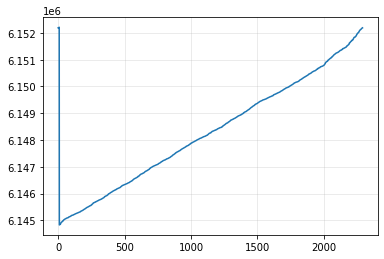

In [141]:
plt.plot(slots)

In [133]:
res3 = []
for s in slots:
    if s < 6148342:
        pass
    time.sleep(0.1)
    url = 'http://57.128.92.65:3500/eth/v2/beacon/blocks/{}'.format(s)
    headers = {'content-type': 'application/json'}
    r = requests.get(url, headers=headers)
    try: 
        code = r.json()['code']
        print(s, False)
        res3.append((s, False))
    except KeyError:
        print(s, True)
        res3.append((s, True))

6152192 True
6152193 True
6152194 True
6152195 True
6152196 True
6152202 True
6152205 True
6152210 True
6152212 True
6144827 True
6144830 True
6144832 False
6144834 False
6144837 True
6144838 False
6144844 True
6144851 True
6144854 True
6144880 True
6144888 True
6144892 True
6144902 True
6144916 True
6144920 True
6144928 True
6144930 True
6144935 True
6144936 True
6144943 True
6144944 True
6144947 True
6144948 True
6144949 True
6144957 True
6144960 True
6144982 True
6144985 True
6144988 True
6144989 True
6144991 True
6145002 True
6145009 True
6145013 True
6145017 True
6145018 True
6145022 True
6145029 True
6145034 True
6145037 True
6145038 True
6145042 True
6145043 True
6145048 True
6145050 True
6145051 True
6145052 True
6145053 True
6145056 False
6145061 True
6145067 True
6145070 True
6145074 True
6145075 True
6145080 True
6145081 True
6145083 True
6145084 True
6145086 True
6145088 True
6145089 True
6145091 True
6145092 True
6145093 True
6145094 False
6145096 True
6145098 True
6145101

KeyboardInterrupt: 

In [151]:
toolate = pd.read_csv('downloaded-logs-20230404-212114.csv', delimiter=',')

In [152]:
slots = np.asarray(list(set(toolate['jsonPayload.slot'])))

In [ ]:
slot=6148669 ms=3412
slot=6148694 ms=7036
slot=6149120 ms=3722

In [155]:
slots.min()

6148369

In [156]:
6152818 - 6148369

4449

In [157]:
4/1197

0.003341687552213868

In [ ]:
slot=6148669 ms=3412
slot=6148694 ms=7036
slot=6149120 ms=3722
slot=6152544 ms=3787

In [154]:
res3 = []
for s in slots:
    time.sleep(0.1)
    url = 'http://57.128.92.65:3500/eth/v2/beacon/blocks/{}'.format(s)
    headers = {'content-type': 'application/json'}
    r = requests.get(url, headers=headers)
    try: 
        code = r.json()['code']
        print(s, False)
        res3.append((s, False))
    except KeyError:
        print(s, True)
        res3.append((s, True))

6152576 True
6149120 False
6149891 True
6149383 True
6150793 True
6152586 True
6149515 True
6148369 True
6152210 True
6149651 True
6150166 True
6152605 True
6150685 True
6152352 True
6150945 True
6152355 True
6152099 True
6149032 True
6152108 True
6151215 True
6150831 True
6152369 True
6148527 True
6151991 True
6151479 True
6150779 True
6148796 True
6148669 False
6149823 True
6151489 True
6150465 True
6148674 True
6152135 True
6150984 True
6149961 True
6149707 True
6152530 True
6150738 True
6151638 True
6149975 True
6148694 False
6150623 True
6152544 False
6152545 True
6149471 True
6148471 True
6148837 True
6150504 True
6150511 True
6151153 True
6152691 True
6152692 True
6151669 True
6150644 True
6150647 True
6152443 True


## too late post 4000MS

In [158]:
toolate = pd.read_csv('downloaded-logs-20230405-091939.csv', delimiter=',')

In [159]:
slots = np.asarray(list(set(toolate['jsonPayload.slot'])))

In [160]:
slots

array([6156033, 6156323, 6155942, 6155206, 6154758, 6154798, 6155184,
       6155474, 6156084, 6155444, 6155382, 6154806, 6155065, 6156253,
       6155262, 6156063])

In [156]:
6152818 - 6148369

4449

In [157]:
4/1197

0.003341687552213868

In [ ]:
slot=6148669 ms=3412
slot=6148694 ms=7036
slot=6149120 ms=3722
slot=6152544 ms=3787

In [161]:
res3 = []
for s in slots:
    time.sleep(0.1)
    url = 'http://57.128.92.65:3500/eth/v2/beacon/blocks/{}'.format(s)
    headers = {'content-type': 'application/json'}
    r = requests.get(url, headers=headers)
    try: 
        code = r.json()['code']
        print(s, False)
        res3.append((s, False))
    except KeyError:
        print(s, True)
        res3.append((s, True))

6156033 True
6156323 True
6155942 True
6155206 True
6154758 True
6154798 True
6155184 True
6155474 True
6156084 True
6155444 True
6155382 True
6154806 True
6155065 True
6156253 True
6155262 True
6156063 False
